In [1]:
import pandas as pd
import os 
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# OD vs. Features, NOT including ID, OD, Length, and WT:

In [2]:
import pandas as pd
df05 = pd.read_csv("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/vasso_feature_space.csv")
print(df05)

     Length    OD    ID    WT  Feature1  Feature2  Feature3  Feature4  \
0     16.02  4.00  3.24  0.86      1.61      1.83      2.51      3.07   
1     13.44  3.46  2.66  0.82      2.40      2.96      3.42      3.82   
2     14.63  3.86  2.61  0.83      2.13      2.58      3.40      3.89   
3     16.08  4.02  3.38  0.92      1.59      1.79      2.47      2.88   
4     16.03  4.70  3.50  1.00      1.65      1.98      2.39      3.06   
..      ...   ...   ...   ...       ...       ...       ...       ...   
182   18.08  5.85  4.88  0.95      1.15      1.56      1.78      2.12   
183   21.05  6.12  5.67  0.91      0.42      0.85      1.29      1.51   
184   16.55  6.10  4.85  0.85      1.43      1.79      2.04      2.39   
185   17.13  5.75  4.95  0.90      1.32      1.64      1.86      2.26   
186   15.56  5.24  4.58  0.68      1.57      1.80      2.06      2.36   

     Feature5  Feature6  ...  Feature159  Feature160  Feature161  Feature162  \
0        3.46      4.25  ...       10.20   

In [3]:
df05.head()

,Length,OD,ID,WT,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43


In [4]:
df05.dropna(subset = ["ID","OD"], inplace=True)   # Drop NA from Length and ID columns
df05

,Length,OD,ID,WT,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,18.08,5.85,4.88,0.95,1.15,1.56,1.78,2.12,2.43,2.99,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,9.93
183,21.05,6.12,5.67,0.91,0.42,0.85,1.29,1.51,1.64,1.71,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,7.78
184,16.55,6.10,4.85,0.85,1.43,1.79,2.04,2.39,2.53,3.21,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,10.77
185,17.13,5.75,4.95,0.90,1.32,1.64,1.86,2.26,2.42,3.04,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,10.44


In [5]:
df05 = df05.drop(["WT", "Length"], axis=1)
df05.head()

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43


In [6]:
# Checking for missing values
df05.isna().sum()

OD            0
ID            0
Feature1      0
Feature2      0
Feature3      0
             ..
Feature164    0
Feature165    0
Feature166    0
Feature167    0
Feature168    0
Length: 170, dtype: int64

# Increasing number of clusters

## 3 clusters:

In [7]:
scaler03 = MinMaxScaler()

scaler03.fit(df05.iloc[:, 0:169])
df05.iloc[:, 0:169] = scaler03.transform(df05.iloc[:, 0:169])

df05.head()

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0.294271,0.274627,0.572115,0.406639,0.420690,0.422764,0.381551,0.422629,0.624535,0.503448,...,0.650526,0.648765,0.644031,0.641989,0.648107,0.662434,0.655315,0.653602,0.645022,13.62
1,0.153646,0.101493,0.951923,0.875519,0.734483,0.626016,0.651992,0.710483,0.758364,0.817241,...,0.834737,0.838883,0.842278,0.846409,0.837416,0.851852,0.842105,0.833686,0.834416,15.43
2,0.257813,0.086567,0.822115,0.717842,0.727586,0.644986,0.580713,0.653910,0.776952,0.706897,...,0.760000,0.763695,0.768894,0.771271,0.760579,0.766138,0.769866,0.759534,0.760823,14.77
3,0.299479,0.316418,0.562500,0.390041,0.406897,0.371274,0.350105,0.364393,0.624535,0.503448,...,0.618947,0.615467,0.611172,0.605525,0.612472,0.630688,0.623323,0.620763,0.611472,13.32
4,0.476563,0.352239,0.591346,0.468880,0.379310,0.420054,0.373166,0.372712,0.583643,0.493103,...,0.524211,0.517723,0.515882,0.551381,0.476615,0.531217,0.530444,0.516949,0.510823,12.43


In [8]:
df05.iloc[:, 169]

0      13.62
1      15.43
2      14.77
3      13.32
4      12.43
       ...  
182     9.93
183     7.78
184    10.77
185    10.44
186    12.28
Name: Feature168, Length: 187, dtype: float64

In [9]:
km3 = KMeans(n_clusters=3)
y_predicted3 = km3.fit_predict(df05.iloc[:, 2:169])
y_predicted3

array([2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2,
       0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2,
       1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
df05['cluster']=y_predicted3
df05.head()

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168,cluster
0,0.294271,0.274627,0.572115,0.406639,0.420690,0.422764,0.381551,0.422629,0.624535,0.503448,...,0.648765,0.644031,0.641989,0.648107,0.662434,0.655315,0.653602,0.645022,13.62,2
1,0.153646,0.101493,0.951923,0.875519,0.734483,0.626016,0.651992,0.710483,0.758364,0.817241,...,0.838883,0.842278,0.846409,0.837416,0.851852,0.842105,0.833686,0.834416,15.43,0
2,0.257813,0.086567,0.822115,0.717842,0.727586,0.644986,0.580713,0.653910,0.776952,0.706897,...,0.763695,0.768894,0.771271,0.760579,0.766138,0.769866,0.759534,0.760823,14.77,0
3,0.299479,0.316418,0.562500,0.390041,0.406897,0.371274,0.350105,0.364393,0.624535,0.503448,...,0.615467,0.611172,0.605525,0.612472,0.630688,0.623323,0.620763,0.611472,13.32,2
4,0.476563,0.352239,0.591346,0.468880,0.379310,0.420054,0.373166,0.372712,0.583643,0.493103,...,0.517723,0.515882,0.551381,0.476615,0.531217,0.530444,0.516949,0.510823,12.43,2


In [11]:
km3.cluster_centers_

array([[0.75602869, 0.72238688, 0.67739464, 0.63741558, 0.62982929,
        0.67844598, 0.75010326, 0.70388615, 0.60981912, 0.59501621,
        0.63350785, 0.69541988, 0.63681426, 0.56824335, 0.62446423,
        0.58675755, 0.64181669, 0.73375188, 0.52554214, 0.45631068,
        0.5031746 , 0.60749426, 0.70337142, 0.74792816, 0.47828592,
        0.44308   , 0.50471476, 0.6237013 , 0.71970433, 0.79480345,
        0.5307227 , 0.53126503, 0.59287667, 0.671684  , 0.72201304,
        0.75407283, 0.62198993, 0.65695489, 0.68046537, 0.73559948,
        0.76353496, 0.75646259, 0.73688637, 0.66406186, 0.62607841,
        0.61548575, 0.69169096, 0.75045232, 0.56474933, 0.60033069,
        0.64622374, 0.72658899, 0.79308119, 0.78144203, 0.57565248,
        0.56881214, 0.6709782 , 0.73101024, 0.80196348, 0.84826285,
        0.56557121, 0.58912243, 0.67725996, 0.7621992 , 0.79391068,
        0.81908139, 0.64043619, 0.65486453, 0.68512704, 0.72623478,
        0.79244663, 0.84969573, 0.68893387, 0.70

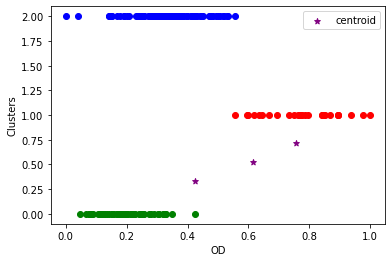

In [12]:
df9 = df05[df05.cluster==0]
df10 = df05[df05.cluster==1]
df11 = df05[df05.cluster==2]
# df3 = df[df.cluster==2]
plt.scatter(df9["OD"],df9["cluster"],color='green')
plt.scatter(df10["OD"], df10["cluster"],color='red')
plt.scatter(df11["OD"], df11["cluster"],color='blue')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('OD')
plt.ylabel('Clusters')
plt.legend()

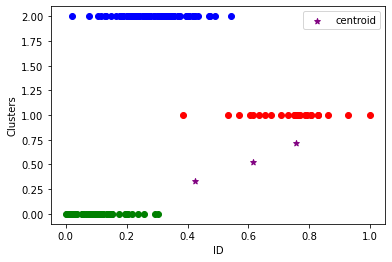

In [13]:
plt.scatter(df9["ID"],df9["cluster"],color='green')
plt.scatter(df10["ID"], df10["cluster"],color='red')
plt.scatter(df11["ID"], df11["cluster"],color='blue')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('ID')
plt.ylabel('Clusters')
plt.legend()

In [14]:
df05_cluster_col3 = df05.drop(df05.iloc[:, 0:170], axis=1)
df05_cluster_col3

,cluster
0,2
1,0
2,0
3,2
4,2
...,...
182,1
183,1
184,1
185,1


## Un-normalizing for 3 clusters:

In [15]:
df05

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168,cluster
0,0.294271,0.274627,0.572115,0.406639,0.420690,0.422764,0.381551,0.422629,0.624535,0.503448,...,0.648765,0.644031,0.641989,0.648107,0.662434,0.655315,0.653602,0.645022,13.62,2
1,0.153646,0.101493,0.951923,0.875519,0.734483,0.626016,0.651992,0.710483,0.758364,0.817241,...,0.838883,0.842278,0.846409,0.837416,0.851852,0.842105,0.833686,0.834416,15.43,0
2,0.257813,0.086567,0.822115,0.717842,0.727586,0.644986,0.580713,0.653910,0.776952,0.706897,...,0.763695,0.768894,0.771271,0.760579,0.766138,0.769866,0.759534,0.760823,14.77,0
3,0.299479,0.316418,0.562500,0.390041,0.406897,0.371274,0.350105,0.364393,0.624535,0.503448,...,0.615467,0.611172,0.605525,0.612472,0.630688,0.623323,0.620763,0.611472,13.32,2
4,0.476563,0.352239,0.591346,0.468880,0.379310,0.420054,0.373166,0.372712,0.583643,0.493103,...,0.517723,0.515882,0.551381,0.476615,0.531217,0.530444,0.516949,0.510823,12.43,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.776042,0.764179,0.350962,0.294606,0.168966,0.165312,0.165618,0.212978,0.271375,0.272414,...,0.196563,0.239869,0.306077,0.121381,0.162963,0.198142,0.190678,0.211039,9.93,1
183,0.846354,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.78,1
184,0.841146,0.755224,0.485577,0.390041,0.258621,0.238482,0.186583,0.249584,0.368030,0.355172,...,0.321160,0.353779,0.392265,0.151448,0.184127,0.223942,0.230932,0.269481,10.77,1
185,0.750000,0.785075,0.432692,0.327801,0.196552,0.203252,0.163522,0.221298,0.364312,0.362069,...,0.282492,0.324206,0.395580,0.165924,0.223280,0.254902,0.252119,0.269481,10.44,1


### ****If you want the chuck below to work, you have to comment out all chuncks in "Increasing Number of Clusters" section.

In [16]:
unscaled3 = scaler03.inverse_transform(df05.iloc[:, 0:169])
unscaled3

array([[ 4.  ,  3.24,  1.61, ..., 11.27, 12.11, 12.84],
       [ 3.46,  2.66,  2.4 , ..., 13.08, 13.81, 14.59],
       [ 3.86,  2.61,  2.13, ..., 12.38, 13.11, 13.91],
       ...,
       [ 6.1 ,  4.85,  1.43, ...,  7.09,  8.12,  9.37],
       [ 5.75,  4.95,  1.32, ...,  7.39,  8.32,  9.37],
       [ 5.24,  4.58,  1.57, ...,  9.07, 10.16, 11.13]])

In [17]:
unscaled3.shape

(187, 169)

In [18]:
df05_denormalized = pd. DataFrame(unscaled3) 
df05_denormalized

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,9.39,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.22,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,10.46,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.09,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,8.17,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.85,4.88,1.15,1.56,1.78,2.12,2.43,2.99,0.99,1.39,...,4.98,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83
183,6.12,5.67,0.42,0.85,1.29,1.51,1.64,1.71,0.26,0.60,...,3.66,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88
184,6.10,4.85,1.43,1.79,2.04,2.39,2.53,3.21,1.25,1.63,...,5.18,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37
185,5.75,4.95,1.32,1.64,1.86,2.26,2.42,3.04,1.24,1.65,...,5.41,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37


In [19]:
df05_denormalized_clusters3 = pd.concat([df05_denormalized, df05_cluster_col3], axis=1, join='inner')
display(df05_denormalized_clusters3)

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,cluster
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,2
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,0
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,0
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,2
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.85,4.88,1.15,1.56,1.78,2.12,2.43,2.99,0.99,1.39,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,1
183,6.12,5.67,0.42,0.85,1.29,1.51,1.64,1.71,0.26,0.60,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,1
184,6.10,4.85,1.43,1.79,2.04,2.39,2.53,3.21,1.25,1.63,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,1
185,5.75,4.95,1.32,1.64,1.86,2.26,2.42,3.04,1.24,1.65,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,1


In [20]:
# Specify the name of the excel file
file_name = 'denormalized_and_clusters3.xlsx'
  
# saving the excelsheet
df05_denormalized_clusters3.to_excel(file_name)
print('Table successfully exported into Excel File')

Table successfully exported into Excel File


In [21]:
df12 = df05_denormalized_clusters3
df12

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,cluster
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,2
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,0
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,0
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,2
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.85,4.88,1.15,1.56,1.78,2.12,2.43,2.99,0.99,1.39,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,1
183,6.12,5.67,0.42,0.85,1.29,1.51,1.64,1.71,0.26,0.60,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,1
184,6.10,4.85,1.43,1.79,2.04,2.39,2.53,3.21,1.25,1.63,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,1
185,5.75,4.95,1.32,1.64,1.86,2.26,2.42,3.04,1.24,1.65,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,1


In [22]:
df12.rename(columns = {0: 'OD', 1: 'ID'}, inplace = True)
df12

,OD,ID,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,cluster
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,2
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,0
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,0
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,2
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.85,4.88,1.15,1.56,1.78,2.12,2.43,2.99,0.99,1.39,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,1
183,6.12,5.67,0.42,0.85,1.29,1.51,1.64,1.71,0.26,0.60,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,1
184,6.10,4.85,1.43,1.79,2.04,2.39,2.53,3.21,1.25,1.63,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,1
185,5.75,4.95,1.32,1.64,1.86,2.26,2.42,3.04,1.24,1.65,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,1
